## Porotifolio Risk Managment Using Python an Example of the Microsoft Stock price (MSFT)
### Financial Returns Visualisations
#### Lamech Muluya Kibudde Datacamp Courses

In [34]:
# Import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

# Read in the csv file and parse dates
StockPrices = pd.read_excel("MSFTPrices.xlsx", parse_dates=['Date']) # The MSFT stock price data

# Ensure the prices and Returns are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Print only the first five rows of StockPrices
print(StockPrices.head())

        Date    Open    High     Low     Close    Volume   Adjusted
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828


        Date    Open    High     Low     Close    Volume   Adjusted   Returns
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


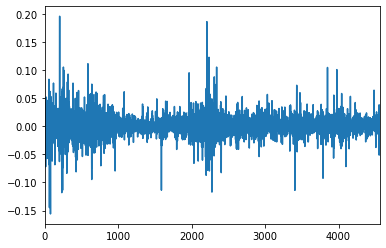

In [35]:
# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Check the first five rows of StockPrices
print(StockPrices.head())

# Plot the returns column over time
StockPrices['Returns'].plot()
plt.show()

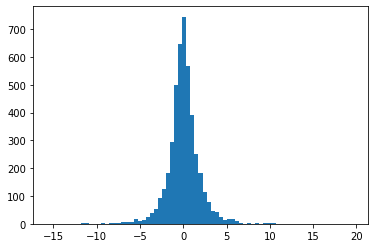

In [36]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75)
plt.show()

## Mean, variance, and normal distribution


In [37]:
# Import numpy as np
import numpy as np

# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print("Daily Return", mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print( "Annulised Return", mean_return_annualized)

Daily Return 0.0003777754643575769
Annulised Return 0.09985839482852632


In [38]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print("Daily Standard Deviation",sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print("Daily Variance",variance_daily)

Daily Standard Deviation 0.019341100408708328
Daily Variance 0.0003740781650197374


In [39]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print("Annualised Standard Deviation",sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print("Annualised Variance",variance_annualized)

Annualised Standard Deviation 0.3070304505826317
Annualised Variance 0.09426769758497383


### Third moment: Skewness

In [40]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print("Returns Skewness", returns_skewness)

Returns Skewness 0.21935459193067805


### Fourth moment: Kurtosis

In [41]:
# # Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print("Excess Kurtosis",excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print("Fourth Moment Kurtosis",fourth_moment)

Excess Kurtosis 10.314572618025519
Fourth Moment Kurtosis 13.314572618025519


### Statistical tests for normality

In [42]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: (0.9003633260726929, 0.0)
P-value:  0.0


## Portfolio composition and backtesting


In [71]:
StockReturns = pd.read_excel("Big9Returns2017.xlsx") # Importing the stock Returns
StockReturns = StockReturns.iloc[:,1:10]
print(StockReturns.head())

       AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
0  0.002849  0.007081  0.006980  0.005468  0.010894  0.005068  0.002848   
1 -0.001119 -0.004474 -0.011002 -0.001640  0.001844  0.004657  0.000316   
2  0.005085  0.000000 -0.014907  0.010463 -0.009205  0.030732 -0.005678   
3  0.011148  0.008668 -0.000565 -0.004792  0.000116  0.019912  0.002855   
4  0.009159 -0.003183 -0.016497 -0.000172  0.000697  0.001168 -0.004745   

         FB         T  
0  0.015732  0.011521  
1  0.015660 -0.005811  
2  0.016682 -0.002806  
3  0.022707 -0.019924  
4  0.012074 -0.012585  


In [72]:
# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

#Portifolio Returns 
port_ret = StockReturns.mul(portfolio_weights, axis=1).sum(axis=1)
print(port_ret.head())

0    0.008082
1    0.000161
2    0.003448
3    0.004660
4   -0.001372
dtype: float64


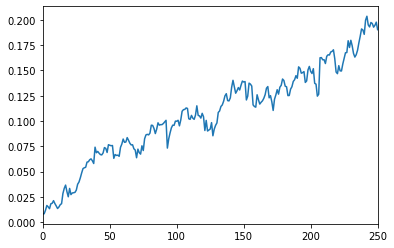

In [73]:
# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [74]:
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

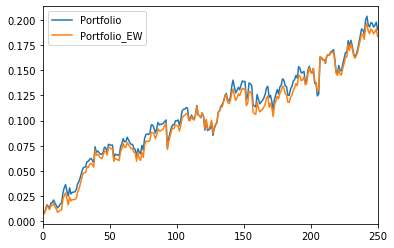

In [77]:
# Ploting the Cummulative Returns 
CumulativeReturns = ((1+StockReturns).cumprod()-1)
CumulativeReturns[["Portfolio","Portfolio_EW"]].plot()

### Market-cap weighted portfolios

In [80]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations / sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
CumulativeReturns(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap']).plot()

TypeError: 'DataFrame' object is not callable